# **Classification & Prediction of Dementia**

**This is a collaboratory project to predict a person's chances of getting dementia and its associated type**

#**One in every family has an elderly person who might be at risk of DEMENTIA**
#DEMENTIA 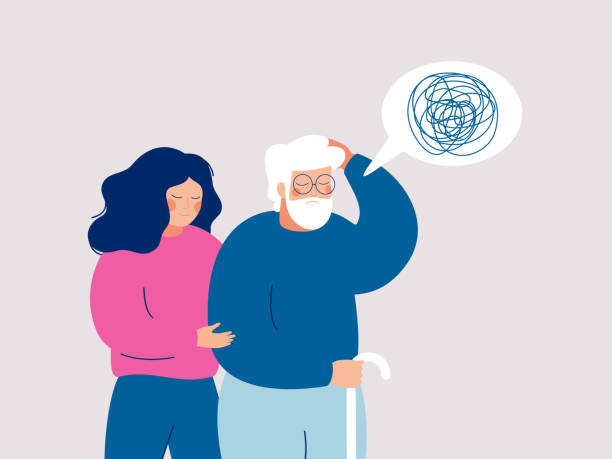

---



---



**Introduction**

When thinking, memory, and reasoning skills are lost to the point where they interfere with day-to-day tasks, this condition is known as dementia. Some dementia patients have emotional instability and personality changes. The intensity of dementia varies from the mildest stage, when it is just starting to interfere with a person's ability to function, to the most severe level, when the individual must fully rely on others for fundamental daily activities.

Currently, there are no cures for these diseases.

The five most common forms of dementia are:

Alzheimer’s disease, 
Frontotemporal dementia, 
Lewy body dementia (Olu Jacobs), 
Vascular dementia,
Mixed dementia,

**Aim and Objectives**

The aim of this project is to build a machine learning model to predict chances that a person will have dementia and the probable type they can have.

The specific objectives includes:
1.   Data gathering from a public repository (kaggle)
2.  Data preparation, EDA and transformation
3.   Training three (3) machine learning models on the  prepared and transformed data 
4. Evaluation of the model performance





**Methodology [Flow Process]**



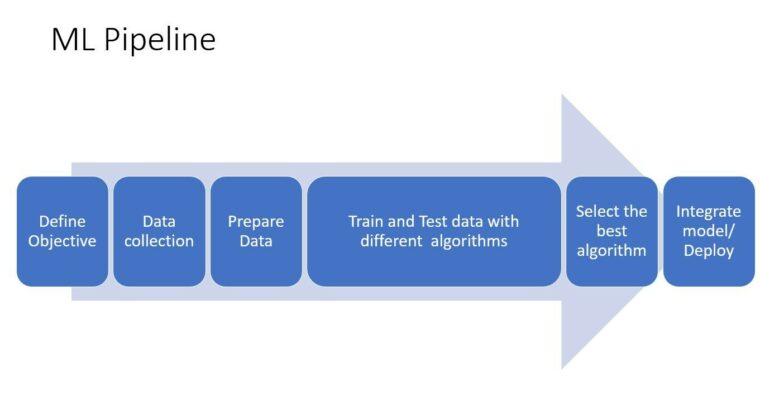

 **Problem Statement**

 As the seventh leading cause of mortality and one of the main causes of disability and dependency among older people worldwide, dementia is frequently unrecognized and misunderstood, which leads to stigmatization and barriers to diagnosis and care.

## **DATA PREPARATION PROCESS**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving dementia_dataset.csv to dementia_dataset.csv


In [67]:
# Reading in the data
dementia = pd.read_csv('dementia_dataset.csv')
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### **Column Description**
EDUC	- Years of Education

SES	- Socioeconomic Status

MMSE	- Mini Mental State Examination

CDR	- Clinical Dementia Rating

eTIV	- Estimated Total Intracranial Volume

nWBV	- Normalize Whole Brain Volume

ASF	- Atlas Scaling Factor

In [68]:
dementia.sample(11)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
110,OAS2_0052,OAS2_0052_MR1,Nondemented,1,0,M,R,74,18,2.0,29.0,0.0,1463,0.737,1.199
222,OAS2_0104,OAS2_0104_MR2,Demented,2,465,M,R,71,16,1.0,17.0,1.0,1562,0.685,1.123
107,OAS2_0051,OAS2_0051_MR1,Nondemented,1,0,F,R,92,23,1.0,29.0,0.0,1454,0.701,1.207
197,OAS2_0094,OAS2_0094_MR2,Nondemented,2,817,F,R,63,16,1.0,30.0,0.0,1449,0.774,1.212
160,OAS2_0073,OAS2_0073_MR5,Nondemented,5,2517,F,R,77,14,3.0,29.0,0.0,1504,0.769,1.167
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
163,OAS2_0076,OAS2_0076_MR1,Nondemented,1,0,F,R,66,18,2.0,30.0,0.0,1504,0.725,1.167
233,OAS2_0112,OAS2_0112_MR1,Demented,1,0,F,R,76,12,3.0,27.0,0.5,1315,0.698,1.335
293,OAS2_0143,OAS2_0143_MR2,Nondemented,2,561,F,R,91,18,2.0,30.0,0.0,1714,0.741,1.024
279,OAS2_0137,OAS2_0137_MR1,Demented,1,0,M,R,74,18,2.0,28.0,0.5,1659,0.739,1.058


## **Data Cleaning and EDA**

In [69]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [70]:
#rename the M/F column to Sex
dementia = dementia.rename(columns = {'M/F':'Sex'}) 

In [71]:
#Create a dictionary to map the categorical values to numeric
group_mapp = {'Nondemented':0,'Demented':1, 'Converted':2} 
sex_mapp = {'M':1, 'F':0}
dementia.Group = dementia.Group.map(group_mapp) #Perform the mapping
dementia.Sex = dementia.Sex.map(sex_mapp)

In [72]:
dementia.head(11)

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,0,2,538,0,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,1,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,0,3,1603,1,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [76]:
# Shape of the dataset
dementia.shape

(373, 15)

In [77]:
# Summary Statistics of the numeric columns
dementia.describe()

,Group,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,0.589812,1.882038,595.104558,0.428954,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.664461,0.922843,635.485118,0.495592,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,2.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**FEATURE SELECTION WITH CORRELATION METHOD**

In [73]:
dementia.corr()

,Group,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.048434,-0.049262,0.143918,0.049267,-0.100606,-0.053845,-0.340257,0.572518,-0.056693,-0.258093,0.042848
Visit,-0.048434,1.000000,0.920009,0.069791,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,-0.049262,0.920009,1.000000,0.048006,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Sex,0.143918,0.069791,0.048006,1.000000,-0.037726,0.089279,-0.045776,-0.166860,0.202140,0.572549,-0.249618,-0.561647
Age,0.049267,0.183213,0.205357,-0.037726,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.100606,0.024615,0.051630,0.089279,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.053845,-0.051622,-0.030813,-0.045776,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.340257,-0.029078,0.065844,-0.166860,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.572518,0.002325,-0.062915,0.202140,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.056693,0.117428,0.119624,0.572549,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877


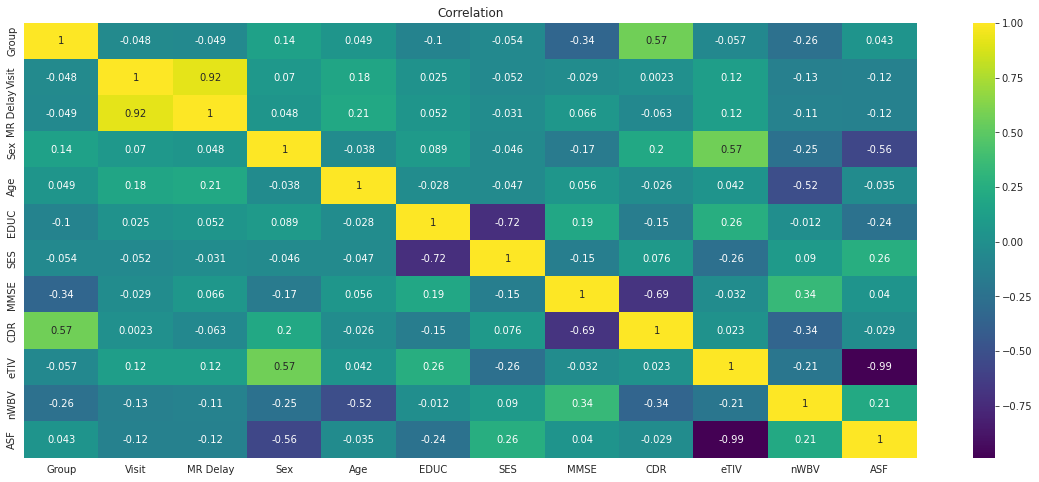

In [74]:
# Visualizing the correlation
plt.figure(figsize= (20, 8))
sns.heatmap(dementia.corr(), annot= True, cmap= 'viridis')
plt.title('Correlation')
plt.show()

In [9]:
#Remove default columns
dementia.drop(['Subject ID', 'MRI ID', 'Hand', 'Visit', 'ASF', 'MR Delay'], axis = 1, inplace=True)

dementia.head()

,Group,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,0,1,87,14,2.0,27.0,0.0,1987,0.696
1,0,1,88,14,2.0,30.0,0.0,2004,0.681
2,1,1,75,12,NaN,23.0,0.5,1678,0.736
3,1,1,76,12,NaN,28.0,0.5,1738,0.713
4,1,1,80,12,NaN,22.0,0.5,1698,0.701


Based on the correlation values we can select the features that are properly related to the target variable : 


* CDR
* SEX
*  AGE
* EDUC
* eTIV
* SES
* nWBIV
* MMSE



OUR TARGET VARIABLE WILL BE THE GROUP COLUMN.

In [10]:
dementia[['CDR']]


,CDR
0,0.0
1,0.0
2,0.5
3,0.5
4,0.5
...,...
368,0.5
369,0.5
370,0.0
371,0.0


In [11]:
dementia.CDR.unique()

array([0. , 0.5, 1. , 2. ])

The Clinical dementia rating here shows us the level of severity of the disease case: 
0	Normal
0.5	Very Mild Dementia
1	Mild Dementia
2	Moderate Dementia
3	Severe Dementia


In [12]:
#Checking for null values
dementia.isna().sum()

Group     0
Sex       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
dtype: int64

#### **Dealing with null values in the SES**

In [13]:
# Unique Values in the SES column
dementia.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

In [14]:
# Checking for rows where SES is null
dementia.query('SES.isnull()', engine= 'python')

,Group,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
2,1,1,75,12,NaN,23.0,0.5,1678,0.736
3,1,1,76,12,NaN,28.0,0.5,1738,0.713
4,1,1,80,12,NaN,22.0,0.5,1698,0.701
10,1,1,71,16,NaN,28.0,0.5,1357,0.748
11,1,1,73,16,NaN,27.0,1.0,1365,0.727
12,1,1,75,16,NaN,27.0,1.0,1372,0.710
134,1,0,80,12,NaN,30.0,0.5,1430,0.737
135,1,0,81,12,NaN,27.0,0.5,1453,0.721
207,1,0,80,12,NaN,27.0,0.5,1475,0.762
208,1,0,83,12,NaN,23.0,0.5,1484,0.750


All Patients whose SES are missing are in the demented group

In [15]:
# Distribution of the SocioEconomic Status of the demented group patients
dementia.query("Group == 1", engine= 'python')['SES'].value_counts()

4.0    38
3.0    33
1.0    26
2.0    25
5.0     5
Name: SES, dtype: int64

SocioEconomic Status Description
1.0 = Very poor
2.0 = Poor
3.0 = Middle class
4.0 = Rich
5.0 = Very rich
 
 We observed that a total number of 127 patients were demented according to their SES, and 43 patients belonged to the richer classes, whereas the rest belong to the lower classes. 

In [16]:
# SocioEconomic Status mean of the demented group patients
dementia.query("Group == 1", engine= 'python')['SES'].mean()

2.7716535433070866

In [17]:
# SocioEconomic Status median of the demented group patients
median = dementia.query("Group == 1", engine= 'python')['SES'].median()
median

3.0

In [18]:
# Filling null values with the median SES of the demented group
dementia.SES.fillna(median, inplace=True)

We decided to settle for the median because both were close to each other and rounding it up gives us 3.0.

#### **Dealing with null values in MMSE**

In [19]:
# Unique Values in the MMSE column
dementia.MMSE.unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [20]:
# The MMSE mean
mean = dementia.MMSE.mean().round()
mean

27.0

In [21]:
# Filling null values with the  MMSE mean
dementia.MMSE.fillna(mean, inplace=True)

In [22]:
# Confirming cleaning efforts
dementia.isna().sum()

Group    0
Sex      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
dtype: int64

In [23]:
# Checking for duplicates
dementia.duplicated().sum()

0

## **Data Visualization**

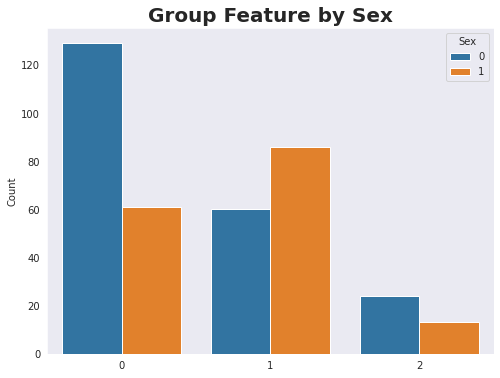

In [79]:
plt.figure ( figsize= (8,6) )
sns.countplot ( dementia.Group, data=dementia, hue='Sex' )
plt.title("Group Feature by Sex", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.xlabel ('', size = 16 )
plt.show()
#plt.savefig('group_by_sex.png', dpi=100, bbox_inches='tight')
#plt.show()

**Observation**

* 0= nondemented, 1 = demented , 2 = converted
* SEX- 0= Female and 1= Male

from this chart, we can deduce that dementia occurs more in the male gender than the female

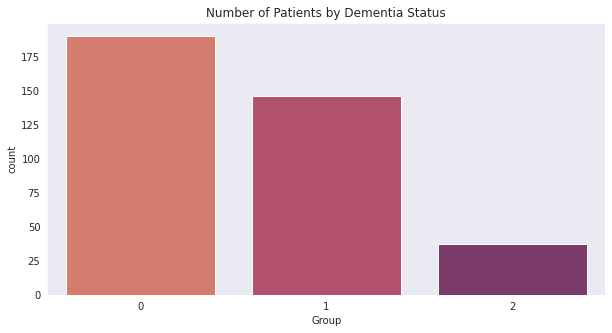

In [29]:
# Visualizing the distribution of Dementia status
sns.set_style('dark')
plt.figure(figsize= (10, 5))
sns.countplot(x= 'Group', data= dementia, palette= 'flare')
plt.title('Number of Patients by Dementia Status')
plt.show()

**Observation**

Checking the distribution of  the target variable classes, we observed that, there are more nondemented patients, closely followed by the demented class and very few converted. 

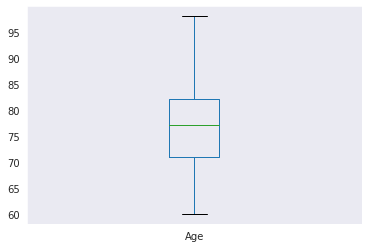

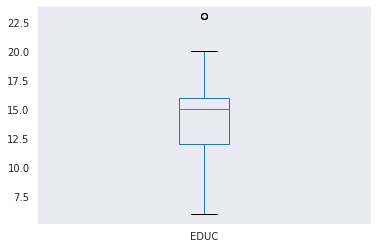

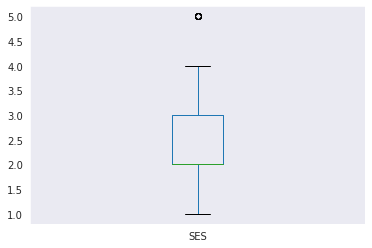

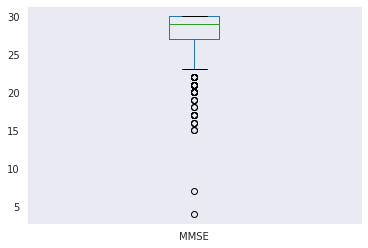

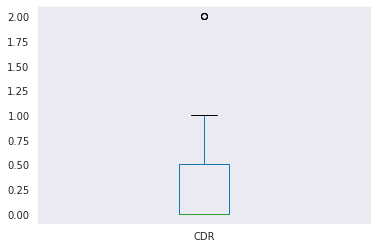

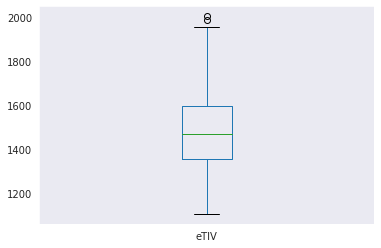

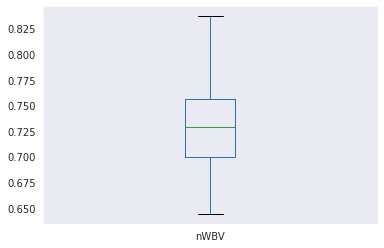

In [30]:
# Checking for outliers distribution by Dementia Status
def plot_boxplot(df, ft):
  dementia.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV']

for feat in features:
  plot_boxplot(dementia, feat)
  print("\n\n")

**Observations on Outliers**

* There are no outliers in the 'Age' and 'nWBV' column
* Outliers in the other columns (EDUC, MMSE, eTIV, SES) will be removed except for those in the 'CDR' columns
* We are exempting CDR because the outlier refers to a rare case of dementia which explains why it was categorized as an outlier

In [31]:
# removing the outliers from the [EDUC, MMSE and eTIV] columns
# First we create a function that returns a list containing all the index of outliers based on interquatile range
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

In [57]:
# Secondly, we create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['EDUC', 'MMSE', 'eTIV', 'SES']:
  index_list.extend(outliers(dementia, feature))

  def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
     

dementia_clean = remove(dementia,index_list)
dementia_clean


,Group,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
2,1,1,75,12,3.0,23.0,0.5,1678,0.736
3,1,1,76,12,3.0,28.0,0.5,1738,0.713
5,0,0,88,18,3.0,28.0,0.0,1215,0.710
6,0,0,90,18,3.0,27.0,0.0,1200,0.718
7,0,1,80,12,4.0,28.0,0.0,1689,0.712
...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694
369,1,1,86,16,1.0,26.0,0.5,1688,0.675
370,0,0,61,13,2.0,30.0,0.0,1319,0.801
371,0,0,63,13,2.0,30.0,0.0,1327,0.796


In [81]:
len(index_list)
index_list

[107,
 108,
 109,
 4,
 25,
 26,
 43,
 44,
 51,
 52,
 60,
 88,
 89,
 90,
 93,
 94,
 97,
 98,
 99,
 100,
 101,
 105,
 106,
 138,
 162,
 172,
 173,
 184,
 185,
 186,
 222,
 225,
 226,
 231,
 232,
 234,
 251,
 299,
 300,
 316,
 317,
 328,
 332,
 360,
 366,
 0,
 1,
 136,
 137,
 138,
 161,
 162,
 179,
 180]

## **MODEL TRAINING AND PREDICTION**

In [35]:
#Choosing our target and features
X = dementia.drop('Group', axis = 1) 
y = dementia[['Group']]
X

,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,1,87,14,2.0,27.0,0.0,1987,0.696
1,1,88,14,2.0,30.0,0.0,2004,0.681
2,1,75,12,3.0,23.0,0.5,1678,0.736
3,1,76,12,3.0,28.0,0.5,1738,0.713
4,1,80,12,3.0,22.0,0.5,1698,0.701
...,...,...,...,...,...,...,...,...
368,1,82,16,1.0,28.0,0.5,1693,0.694
369,1,86,16,1.0,26.0,0.5,1688,0.675
370,0,61,13,2.0,30.0,0.0,1319,0.801
371,0,63,13,2.0,30.0,0.0,1327,0.796


In [36]:
y

,Group
0,0
1,0
2,1
3,1
4,1
...,...
368,1
369,1
370,0
371,0


In [80]:
#Normalizing using Standard scaler and training our model
scaler = StandardScaler() #create an object of StandardScaler
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_norm

,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,1.153798,1.308738,-0.208132,-0.439762,-0.092813,-0.777653,2.836059,-0.905169
1,1.153798,1.439787,-0.208132,-0.439762,0.724963,-0.777653,2.932703,-1.309643
2,1.153798,-0.263856,-0.904394,0.461509,-1.183181,0.559050,1.079409,0.173429
3,1.153798,-0.132806,-0.904394,0.461509,0.179779,0.559050,1.420506,-0.446765
4,1.153798,0.391392,-0.904394,0.461509,-1.455772,0.559050,1.193108,-0.770344
...,...,...,...,...,...,...,...,...
368,1.153798,0.653491,0.488130,-1.341034,0.179779,0.559050,1.164683,-0.959099
369,1.153798,1.177688,0.488130,-1.341034,-0.365405,0.559050,1.136259,-1.471432
370,-0.866703,-2.098548,-0.556263,-0.439762,0.724963,-0.777653,-0.961488,1.926149
371,-0.866703,-1.836449,-0.556263,-0.439762,0.724963,-0.777653,-0.916009,1.791325


In [38]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.3, random_state = 1, stratify = y) 

In [39]:
len(X_train)

261

In [40]:
len(y_test)

112

In [41]:
classifiers = [ LogisticRegression(random_state=42), SVC (random_state=42),
       RandomForestClassifier(random_state=42), XGBClassifier(random_state=42) ]
model_names = [ 'Logistic Regression', 'Support vector machine', 'Random Forest', 'XGradient boost' ]

In [42]:
#Define a function to check the performance of different models 
def train_val_models(classifiers, model_names, X_train, y_train, X_test, y_test):

  reports = []

  for clf, model in zip(classifiers,model_names):
    clf.fit ( X_train, y_train )
    y_pred = clf.predict (X_test)
    report = classification_report(y_test, y_pred)
    reports.append(report)

  return model_names, reports

In [55]:
model_names, reports = train_val_models(classifiers, model_names, X_train,y_train, X_test, y_test)

In [56]:
for name,report in zip(model_names,reports):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       0.96      1.00      0.98        44
           2       1.00      0.36      0.53        11

    accuracy                           0.94       112
   macro avg       0.96      0.79      0.82       112
weighted avg       0.94      0.94      0.92       112




Support vector machine
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       0.95      0.95      0.95        44
           2       0.67      0.36      0.47        11

    accuracy                           0.92       112
   macro avg       0.85      0.77      0.79       112
weighted avg       0.91      0.92      0.91       112




Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        57
           1       0.93      0.95      0.94        44
           2

**OBSERVATION**

The logistic regression model gave the best level of accuracy.

In [60]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [62]:
#Print Classification Report for training data
target_names = ['Demented', 'Non Demented', 'Converted']
print(classification_report(y_train, model.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.91      0.98      0.95       133
Non Demented       0.94      0.99      0.96       102
   Converted       0.89      0.31      0.46        26

    accuracy                           0.92       261
   macro avg       0.91      0.76      0.79       261
weighted avg       0.92      0.92      0.90       261



In [61]:
#Print Classification Report for test data
target_names = ['Demented', 'Non Demented', 'Converted']
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.92      1.00      0.96        57
Non Demented       0.96      1.00      0.98        44
   Converted       1.00      0.36      0.53        11

    accuracy                           0.94       112
   macro avg       0.96      0.79      0.82       112
weighted avg       0.94      0.94      0.92       112



**CONFUSION MATRIX**

Number of records in the test dataset: 112



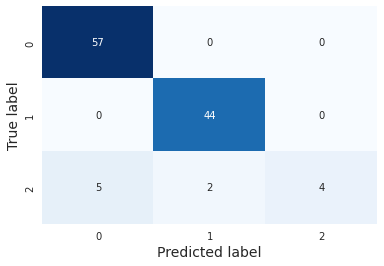

In [64]:
conf_matrix = confusion_matrix (  y_test, model.predict(X_test) )

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

# fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
#plot 1
sns.heatmap(conf_matrix,annot=True, cmap='Blues', cbar=False, fmt='d')
plt.xlabel('Predicted label', size = 14)
plt.ylabel('True label', size = 14)
plt.savefig('conf_matrix.png', dpi=100, bbox_inches='tight')
     

**OBSERVATION :**

In cell 0,  our model predicted True Positive = 57, This means that where the model was expected to predict for nondemented, it predicted that 57 patients where accurately non demented. However, there was no case of wrong prediction  

In Cell 1, our model predicted True Positive = 44,This means that where the model was expected to predict for demented, it predicted that 44 patients where accurately demented. However, there was no case of wrong prediction.

In Cell 2, our model predicted True Positive = 4,This means that where the model was expected to predict for patients who earlier showed signs of dementia , it predicted that 4 patients where accurately converted. However, there were cases of wrong predictions.








## **CONCLUSION**

The Logistic Regression machine learning algorithm is used to estimate the dementia classification
group for the dataset. When compared to other machine learning models, the model
delivers the highest testing accuracy of 94% in categorizing the dataset.


Logistic regression is used to predict the categorical dependent variable with the help of independent variables especially in cases where  probabilities between two classes is required. Such as whether it will rain today or not, either 0 or 1, true or false etc.


Furthermore, we
can determine the probable type of dementia for each classification by looking at the CDR
value, where;
• 0 means the patient is cognitively normal.
• 0.5 means the patient has very mild dementia.
• 1 means the patient has mild dementia.
• 2 means the patient has moderate dementia.

# **RECOMMENDATION**

It was found that the models performed better without the converted
category, hence we recommend that the converted category of the group column should be changed to either demented
or nondemented or outrightly removed.

We also suggest pictoral cognitive reminder exercises for severly demented patients.

**REFERENCES**

Chimeremma Amadi, 
Blessing Ideh,
Bolanle Rhodes
Chimamaka Chris-Nwaije,
Chiamaka Egwuatu,
Chikosolu Njoku,
Bukunmi Olatoye,
Blessing Salami,
Aishat Olukotun,
Blessing Egwuenu,
Boluwatife Soladoye,
Celia Omionawele,
Chetachi Ifeanacho, 
Chiamaka Udeh,
Deborah Ojo